In [ ]:
!pip install Keras==2.2.4
!pip install tensorflow-gpu==1.15


     |████████████████████████████████| 317kB 20.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 411.5MB 37kB/s 
     |████████████████████████████████| 512kB 45.0MB/s 
     |████████████████████████████████| 3.8MB 37.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=a42ba9761470c4c84219277558b44fe420b945f7fd022c5e17fc6b8384a9bbcc
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-es

In [ ]:
import os
import re
import pickle
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
# from keras.layers import Embedding
from  keras . utils  import  to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Permute
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
train_data=pd.read_csv('gdrive/My Drive/Thesis Data/Our dataset/OurDataset_train.csv')
stopwords=pd.read_csv('gdrive/My Drive/Colab Notebooks/Stopwords.csv')
test_data=pd.read_csv('gdrive/My Drive/Thesis Data/Our dataset/OurDataset_test.csv')


In [ ]:
!git clone -l -s https://github.com/banglakit/bengali-stemmer.git

Cloning into 'bengali-stemmer'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 94 (delta 5), reused 16 (delta 4), pack-reused 69
Unpacking objects: 100% (94/94), done.


In [ ]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git    

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-0w_vbp3p
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-0w_vbp3p
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=28efde01c9976f565aa9c75a2688651648540a7e7d9729892b330f5d135545a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-yptppv4k/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git    

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-vqa7z41i
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-vqa7z41i
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=9b05d8344c633a3289d3034096fc275f9e2215cd5e17131b5cccd3b099b2a3d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-8zbhfdv4/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('বাংলায়')

'বাংলা'

In [ ]:
total_data = train_data
total_data=total_data.append(test_data, ignore_index = True)

In [ ]:
macronum=sorted(set(total_data['label']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

total_data['label']=total_data['label'].apply(fun)


In [ ]:
texts = list(total_data['text'])
labels = list(total_data['label'])

In [ ]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    return cleaned1

In [ ]:
set_stop = set(stopwords['words'])

In [ ]:

def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if((cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
texts = pre_process(texts)

In [ ]:
texts[0]

'দূর ভরত হেস উঠল আপন বালিকা বধূ স্কুল পাঠানো সরলা বিবির টানাটানি সরলা বেথুন স্কুল লোরে হাউজ দুজন ধারণা স্কুল ভালো বেথুন স্কুল বাঙা পাড়া বাংলা মাধ্যম লোরেটো হাউজ সাহেব পাড় ইংরেজি স্কুল বাঙা ছাত্রীর তুলনা ফিরিঙ্গি ছাত্রী বেথুন ছাত্রী সমাজ নাম মহিলা বছর বেথুন ছাত্রী হইচ প্রবেশিকা পরীক্ষা ভালোভাব উত্তীর্ণ অবলা দাস নাম মেয়ে ডাক্তারি পড়ব কলকাতা মেডিক কলেজ ছাত্রী নেয়া অবল কেনো ডাক্তারি পারব শেষ পাঠি মাদ্রাজ মেডিক কলেজ অবল জেদ বাঙলা সরক কুড়ি টাক মাসিক বৃত্তির অনুমোদন দেশ কোথা আন্দোলন বেথুন কলেজ প্রভাব ইলবার্ট বিল সাহেব দেশী মানুষ বিদ্য বুদ্ধি প্রচ লাগল কামিনী নাম তেজস্বিনী ছাত্রীর নেতৃত্ব বেথুন বিক্ষোভ জানি সুর বাড়ুজ্য যেদিন সেদিন বেথুন ছাত্রী কালো বেধ স্কুল লোরেটো হাউজ এসব স্বদেশিয়ানা নিষিদ্ধ প্রভু যিশুর জয়গান নিয়মিত প্রার্থনা ছাত্রী ভালো ইংরেজি শেখ বিলিতি আদব কায়দা রপ্ত পাস ব্যারিস্ পত্নী হিসেব মানি বিবির বয়েস বছর সরল এগারো মামা পিসতু বোন ভাব মাঝ মাঝ তর্ক বয়েস সরল ইংরেজ শাসন সম্পর্ রাগ রাগ ভাব প্রা আবৃত্তি স্বাধীনতা হীনতা বাঁচি বাঁচি বয়েসী পরিবার নিয়ম কাকিমা মামী সরলা ছুট দুজন হাত ইক

In [ ]:
def load_data(num_words, sequence_length, test_size=0.25, oov_token=None):
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    num_classes=16
    y = to_categorical(np.asarray(labels), num_classes)
    tokenizer.fit_on_texts(texts)
    X = tokenizer.texts_to_sequences(texts)
    X = np.array(X)
    # pad sequences with 0's
    X = pad_sequences(X, maxlen=sequence_length)
    # split data to training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    data = {}
    data["X_train"] = X_train
    data["X_test"]= X_test
    data["y_train"] = y_train
    data["y_test"] = y_test
    data["tokenizer"] = tokenizer
    return data

In [ ]:
# train_data=pd.read_csv('gdrive/My Drive/Colab Notebooks/ulm_train.csv')
import numpy as np

def get_embedding_vectors(word_index, embedding_size=100):
    
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_size))
    with open(f"gdrive/My Drive/Colab Notebooks/bn_glove.{embedding_size}d.txt", encoding="utf8") as f:
        for line in tqdm(f, "Reading GloVe"):
            values = line.split()
            # get the word as the first word in the line
            word = values[0]
            if word in word_index:
                idx = word_index[word]
                # get the vectors as the remaining values in the line
                embedding_matrix[idx] = np.array(values[1:], dtype="float32")
    return embedding_matrix

In [ ]:
d = set()
for s in texts:
    for ss in list(s.split()):
        d.add(ss)

In [ ]:
len(d)

284632

In [ ]:
max([len(s.split()) for s in texts]) # find the max length

606

In [ ]:
len(data['tokenizer'].word_index)

NameError: ignored

In [ ]:
MAX_SEQUENCE_LENGTH = 606    #max([len(s.split()) for s in texts]) 
MAX_NUM_WORDS = 280432 + 1  # 'MAX_NUM_WORDS' is length of tokenizer + 1
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)

In [ ]:
embedding_matrix = get_embedding_vectors( data['tokenizer'].word_index ,EMBEDDING_DIM )

Reading GloVe: 134256it [00:07, 18137.63it/s]


In [ ]:
max_words = 280432 + 1
# max_len = 11276
# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(X_train)
# sequences = tok.texts_to_sequences(X_train)
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU 
from keras.layers import GRU, LSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [ ]:
class Attention(Layer):
    """
    Keras Layer that implements an Attention mechanism for temporal data.
    Supports Masking.
    Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    :param kwargs:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(Attention())
    """   
   
   
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)          
            
            
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True
    
    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

max_len = 606 (as usual), bs=64

In [ ]:
#max_features = 30000
max_features = 280432 + 1
max_len = 606
def build_model(max_len, max_features, EMBEDDING_DIM, embedding_matrix):
    input_words = Input((max_len, ))
    x_words = Embedding(max_features,
                        EMBEDDING_DIM,
                        weights=[embedding_matrix],
                        mask_zero=True,
                        trainable=False)(input_words)
    x_words = SpatialDropout1D(0.2)(x_words)
    x_words = Bidirectional(LSTM(128, return_sequences=True))(x_words)
    x_words = Bidirectional(LSTM(128, return_sequences=True))(x_words)
    
    x = Attention(max_len)(x_words)
    #x = GlobalMaxPooling1D()(x)
    #x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    pred = Dense(16, activation='softmax')(x)

    model = Model(inputs=input_words, outputs=pred)
    return model

model = build_model(max_len, max_features, EMBEDDING_DIM, embedding_matrix)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
'''
MAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) 
MAX_NUM_WORDS = 109803 + 1
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)
'''











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 606)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 606, 300)          84129900  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 606, 300)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 606, 256)          439296    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 606, 256)          394240    
_____________________________________________________

'\nMAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) \nMAX_NUM_WORDS = 109803 + 1\nvocab_size = MAX_NUM_WORDS\nEMBEDDING_DIM = 300\nVALIDATION_SPLIT = 0.2\n\ndata = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)\n'

epochs = 40 with loss curve and f1 score



Train on 14372 samples, validate on 3594 samples
Epoch 1/20
 - 1178s - loss: 1.5313 - acc: 0.5035 - val_loss: 0.8522 - val_acc: 0.7159
Epoch 2/20
 - 1140s - loss: 0.7926 - acc: 0.7367 - val_loss: 0.5170 - val_acc: 0.8333
Epoch 3/20
 - 1122s - loss: 0.4912 - acc: 0.8437 - val_loss: 0.3141 - val_acc: 0.8979
Epoch 4/20
 - 1161s - loss: 0.3437 - acc: 0.8903 - val_loss: 0.2491 - val_acc: 0.9235
Epoch 5/20
 - 1174s - loss: 0.2965 - acc: 0.9070 - val_loss: 0.2372 - val_acc: 0.9296
Epoch 6/20
 - 1173s - loss: 0.2124 - acc: 0.9360 - val_loss: 0.1936 - val_acc: 0.9416
Epoch 7/20
 - 1153s - loss: 0.1759 - acc: 0.9438 - val_loss: 0.1635 - val_acc: 0.9502
Epoch 8/20
 - 1134s - loss: 0.1527 - acc: 0.9523 - val_loss: 0.1683 - val_acc: 0.9491
Epoch 9/20
 - 1136s - loss: 0.1140 - acc: 0.9653 - val_loss: 0.1721 - val_acc: 0.9519
Epoch 10/20
 - 1136s - loss: 0.1041 - acc: 0.9672 - val_loss: 0.1370 - val_acc: 0.9610
Epoch 11/20
 - 1131s - loss: 0.0892 - acc: 0.9718 - val_loss: 0.1418 - val_acc: 0.9591
E

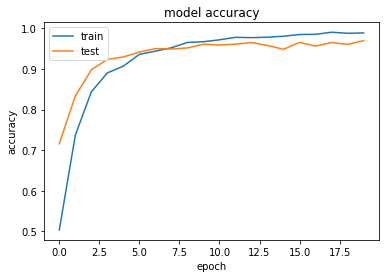

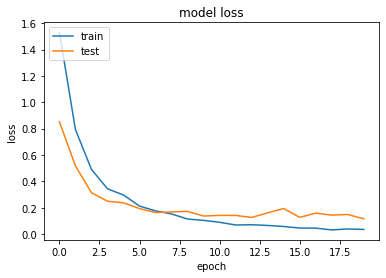

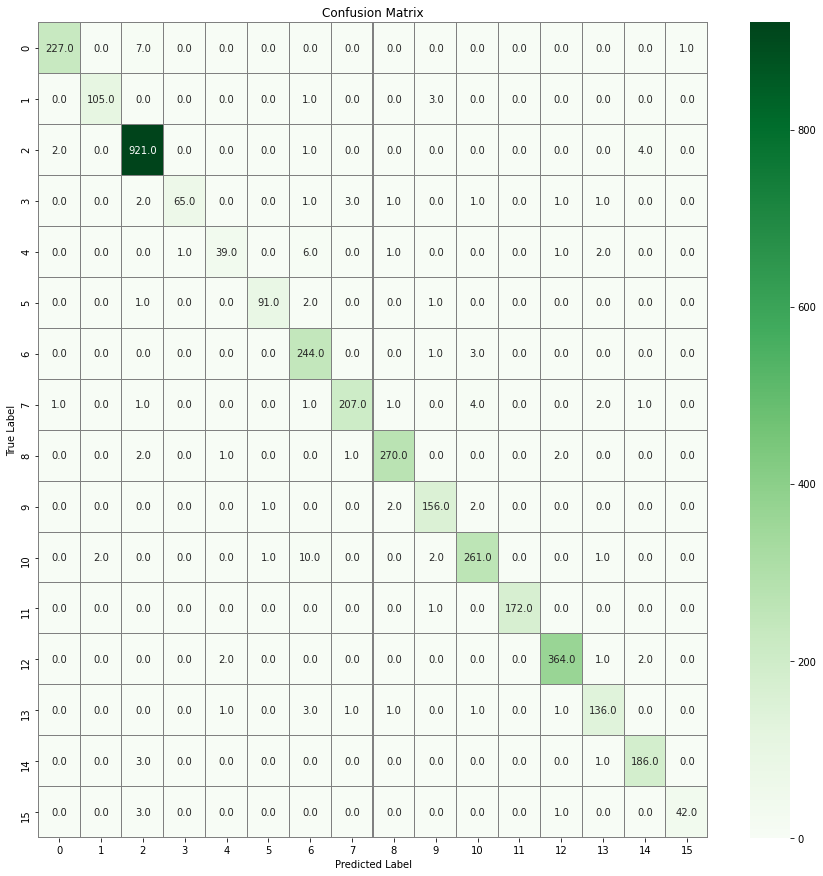

f1-score:
0.9563104491404517
precision_score:
0.9662245312853377
recall_score:
0.9478899247627817
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       235
           1       0.98      0.96      0.97       109
           2       0.98      0.99      0.99       928
           3       0.98      0.87      0.92        75
           4       0.91      0.78      0.84        50
           5       0.98      0.96      0.97        95
           6       0.91      0.98      0.94       248
           7       0.98      0.95      0.96       218
           8       0.98      0.98      0.98       276
           9       0.95      0.97      0.96       161
          10       0.96      0.94      0.95       277
          11       1.00      0.99      1.00       173
          12       0.98      0.99      0.99       369
          13       0.94      0.94      0.94       144
          14       0.96      0.98      0.97       190
          15       0.98      0.91    

In [ ]:
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=20, verbose=2, batch_size=64)

def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

history2(history)

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(model)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
Y_pred = model.predict(data['X_test'])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(data['y_test'],axis = 1) 
# compute the confusion matrix
print("f1-score:")
print(f1_score(Y_true, Y_pred_classes, average="macro"))
print("precision_score:")
print(precision_score(Y_true, Y_pred_classes, average="macro"))
print("recall_score:")
print(recall_score(Y_true, Y_pred_classes, average="macro")) 

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(Y_true, Y_pred_classes))

model.save("trainedmodel_20Epoch.h5") # saving the model
#model = load_model('trainedmodel_11Epoch.h5')# loading model trained for 50 Epochs
#history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=4, verbose=2)

hist_df = pd.DataFrame(history.history) 
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [ ]:
model = load_model('trainedmodel_20Epoch.h5')# loading model trained for 50 Epochs
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=10, verbose=2)
model.save("trainedmodel_30Epoch.h5") # saving the model


def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

history2(history)

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(model)



from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
Y_pred = model.predict(data['X_test'])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(data['y_test'],axis = 1) 
# compute the confusion matrix
print("f1-score:")
print(f1_score(Y_true, Y_pred_classes, average="macro"))
print("precision_score:")
print(precision_score(Y_true, Y_pred_classes, average="macro"))
print("recall_score:")
print(recall_score(Y_true, Y_pred_classes, average="macro")) 

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(Y_true, Y_pred_classes))


hist_df = pd.DataFrame(history.history) 
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

OSError: ignored

In [ ]:
# load the save model and history and again run on 50 epochs
'''
from keras.models import load_model
model = load_model('trainedmodel_50Epoch.h5')# loading model trained for 50 Epochs

hstry = model.fit_generator(......) # training the model for another 50 Epochs

model.save("trainedmodel_50Epoch.h5") # saving the model 

with open('trainHistoryOld', 'wb') as handle: # saving the history of the model trained for another 50 Epochs
    dump(hstry.history, handle)

from pickle import load
import matplotlib.pyplot as plt

with open('trainHistoryOld', 'rb') as handle: # loading old history 
    oldhstry = load(handle)

oldhstry['loss'].extend(hstry['loss'])
oldhstry['acc'].extend(hstry['acc'])
oldhstry['val_loss'].extend(hstry['val_loss'])
oldhstry['val_acc'].extend(hstry['val_acc'])

# Plotting the Accuracy vs Epoch Graph
plt.plot(oldhstry['acc'])
plt.plot(oldhstry['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting the Loss vs Epoch Graphs
plt.plot(oldhstry['loss'])
plt.plot(oldhstry['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

'''

epochs = 10

In [ ]:
# use only 10 epochs
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=30, verbose=2, batch_size=64)



Train on 14372 samples, validate on 3594 samples
Epoch 1/30
 - 1150s - loss: 1.5275 - acc: 0.5098 - val_loss: 0.8419 - val_acc: 0.7309
Epoch 2/30
 - 1147s - loss: 0.7804 - acc: 0.7410 - val_loss: 0.4950 - val_acc: 0.8306
Epoch 3/30
 - 1148s - loss: 0.5086 - acc: 0.8335 - val_loss: 0.3878 - val_acc: 0.8854
Epoch 4/30
 - 1150s - loss: 0.3715 - acc: 0.8840 - val_loss: 0.2789 - val_acc: 0.9129
Epoch 5/30
 - 1175s - loss: 0.2745 - acc: 0.9137 - val_loss: 0.2433 - val_acc: 0.9277
Epoch 6/30
 - 1182s - loss: 0.2228 - acc: 0.9310 - val_loss: 0.2067 - val_acc: 0.9382
Epoch 7/30
 - 1162s - loss: 0.1839 - acc: 0.9416 - val_loss: 0.1874 - val_acc: 0.9416
Epoch 8/30
 - 1175s - loss: 0.1486 - acc: 0.9540 - val_loss: 0.1835 - val_acc: 0.9477
Epoch 9/30
 - 1156s - loss: 0.1265 - acc: 0.9604 - val_loss: 0.1606 - val_acc: 0.9519
Epoch 10/30
 - 1204s - loss: 0.1066 - acc: 0.9675 - val_loss: 0.1321 - val_acc: 0.9599
Epoch 11/30
 - 1199s - loss: 0.0863 - acc: 0.9733 - val_loss: 0.1382 - val_acc: 0.9608
E

epochs = 11

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [ ]:
# use only 30 epochs
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=30, verbose=2, batch_size=64)
model.save("trainedmodel_30Epoch.h5") # saving the model
with open('trainHistoryOld', 'wb') as handle: # saving the history of the model
    dump(history.history, handle)

Train on 14372 samples, validate on 3594 samples
Epoch 1/30
 - 1232s - loss: 1.4327 - acc: 0.5255 - val_loss: 0.7967 - val_acc: 0.7435
Epoch 2/30
 - 1232s - loss: 0.7300 - acc: 0.7629 - val_loss: 0.4646 - val_acc: 0.8506
Epoch 3/30
 - 1195s - loss: 0.4693 - acc: 0.8516 - val_loss: 0.3073 - val_acc: 0.9023
Epoch 4/30
 - 1195s - loss: 0.3307 - acc: 0.8956 - val_loss: 0.2339 - val_acc: 0.9279
Epoch 5/30
 - 1189s - loss: 0.2459 - acc: 0.9242 - val_loss: 0.1996 - val_acc: 0.9418
Epoch 6/30
 - 1171s - loss: 0.1991 - acc: 0.9353 - val_loss: 0.2465 - val_acc: 0.9215
Epoch 7/30
 - 1161s - loss: 0.1526 - acc: 0.9512 - val_loss: 0.1483 - val_acc: 0.9535
Epoch 8/30
 - 1154s - loss: 0.1354 - acc: 0.9597 - val_loss: 0.1339 - val_acc: 0.9605
Epoch 9/30
 - 1151s - loss: 0.1119 - acc: 0.9655 - val_loss: 0.1423 - val_acc: 0.9591
Epoch 10/30
 - 1160s - loss: 0.0982 - acc: 0.9693 - val_loss: 0.1144 - val_acc: 0.9674
Epoch 11/30
 - 1148s - loss: 0.0733 - acc: 0.9772 - val_loss: 0.1198 - val_acc: 0.9638
Epo